In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
companyValues = pd.read_csv('CompanyValues.csv')

In [9]:
companyValues['change'] = 100 * ((companyValues['close_value'] - companyValues['open_value']) / companyValues['open_value'])

In [10]:
companyValues.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,change
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47,-0.410337
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63,0.467216
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09,0.623142
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50,-2.092736
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35,0.988061


In [11]:
companyValues['change'].describe()

count    17528.000000
mean        -0.001356
std          1.637464
min        -19.753521
25%         -0.756510
50%          0.001194
75%          0.792675
max         25.736842
Name: change, dtype: float64

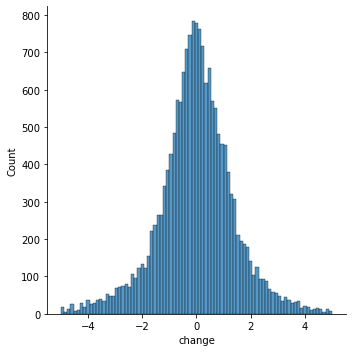

In [12]:
sns.displot(companyValues['change'], binrange = ([-5, 5]))

In [13]:
# labeling
# binary
for i in range(len(companyValues)):
  if companyValues.loc[i, 'change'] < 0:
    companyValues.loc[i, 'label'] = 0 
  else:
    companyValues.loc[i, 'label'] = 1


In [14]:
# splitting data by companies

apple = companyValues[companyValues['ticker_symbol'] == 'AAPL']
apple.to_csv("Apple data.csv", index = False)
googl = companyValues[companyValues['ticker_symbol'] == 'GOOGL']
googl.to_csv("GOOGL data.csv", index = False)
goog = companyValues[companyValues['ticker_symbol'] == 'GOOG']
goog.to_csv("GOOG data.csv", index = False)
tesla = companyValues[companyValues['ticker_symbol'] == 'TSLA']
tesla.to_csv("Tesla data.csv", index = False)
microsoft = companyValues[companyValues['ticker_symbol'] == 'MSFT']
microsoft.to_csv("Microsoft data.csv", index = False)

In [15]:
# checking the size of each company data

apple_size = apple.shape[0]
googl_size = googl.shape[0]
goog_size = goog.shape[0]
tesla_size = tesla.shape[0]
microsoft_size = microsoft.shape[0]

## Every company has around 3000 data points 

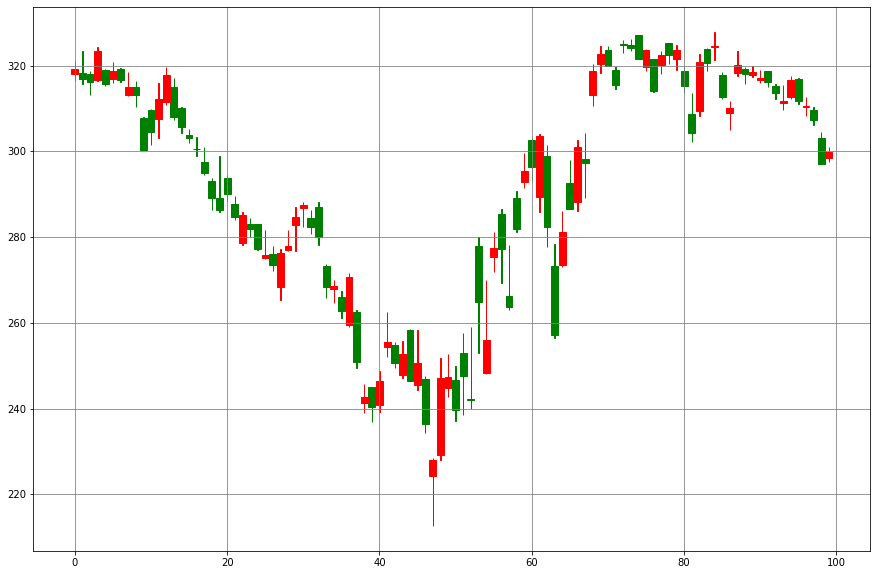

In [16]:
import matplotlib.pyplot as plt
width  = 0.9   # width of real body
width2 = 0.05  # width of shadow
fig, ax = plt.subplots(figsize=(15,10))
# find the rows that are bullish
companyValues = companyValues[:100]
dfup = companyValues[companyValues["close_value"] >= companyValues["open_value"]]
# find the rows that are bearish
dfdown = companyValues[companyValues["close_value"] < companyValues["open_value"]]
# plot the bullish candle stick
ax.bar(dfup.index, dfup.close_value - dfup.open_value, width, 
       bottom = dfup.open_value, edgecolor='g', color='green')
ax.bar(dfup.index, dfup.high_value - dfup.close_value, width2, 
       bottom = dfup.close_value, edgecolor='g', color='green')
ax.bar(dfup.index, dfup.low_value - dfup.open_value, width2, 
       bottom = dfup.open_value, edgecolor='g', color='green')
# plot the bearish candle stick
ax.bar(dfdown.index, dfdown.close_value - dfdown.open_value, width, 
       bottom = dfdown.open_value, edgecolor='r', color='red')
ax.bar(dfdown.index, dfdown.high_value - dfdown.open_value, width2, 
       bottom = dfdown.open_value, edgecolor='r', color='red')
ax.bar(dfdown.index, dfdown.low_value - dfdown.close_value, width2, 
       bottom = dfdown.close_value, edgecolor='r', color='red')
ax.grid(color='gray')

In [20]:
from PIL import Image
import os
from numpy import asarray
import re
from sklearn.model_selection import train_test_split


In [84]:
import csv
companies = ['APPL',] # 'GOOG', 'GOOGL', 'MSFT', 'TSLA']
x = []
y = []

for c in companies:
    with open(f'data/{c}.csv', newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(row[0])
            y.append(row[1])
x = x[1:]
y = [int(i) for i in y[1:]]

        # print([row for row in reader])

# print(y)
companies

['APPL']

In [86]:
x = np.array(x)
y = np.array(y)

In [128]:
# convert images to array of pixels

pixels = np.zeros(shape=(3055, 100, 100))
# images = os.listdir('images/')

for i in range(len(x)):
  # if i == '.DS_Store':
  #   images.remove(i)
  # else:
  image = Image.open('data/images/'+ x[i] + '.png', mode='r').convert('L')
  data = asarray(image)
  pixels[i] = data
  #np.append(pixels, data)
  # pixels.append(data)
#len(pixels) 
# size = (14292, 100, 100, 4)
# images

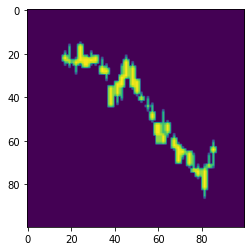

In [129]:
plt.imshow(pixels[0])

In [90]:
pixels[0].shape

(100, 100, 4)

In [91]:
pixels = pixels / 255.0 # normalization

#labels = ...

X_train, X_test, Y_train, Y_test = train_test_split(pixels, y, test_size = 0.2, random_state=2) # splitting the dataset into train and test

In [92]:
Y_train

array([0, 1, 1, ..., 1, 0, 1])

In [120]:
#https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial/notebook
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (3, 3),padding = 'Same', activation ='relu', input_shape = (100,100,4)))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
# model.add(Dropout(0.2))
model.add(Dense(1, activation = "softmax"))

In [121]:
# optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999) # using Adam optimizer with learning rate 0.001

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
# model.summary()

In [122]:
epochs = 15  # for better result increase the epochs
batch_size = 512

#fit the model
history = model.fit(X_train,Y_train, batch_size=batch_size, epochs = epochs, validation_data = (X_test,Y_test),)# steps_per_epoch=X_train.shape[0] // batch_size)
                              

Epoch 1/15


2022-10-07 15:55:52.217593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 518ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 2/15


2022-10-07 15:55:54.733008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 296ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 3/15
5/5 [==============================] - 1s 286ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 4/15
5/5 [==============================] - 1s 265ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 5/15
5/5 [==============================] - 2s 304ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 6/15
5/5 [==============================] - 1s 276ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 7/15
5/5 [==============================] - 1s 266ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 8/15
5/5 [==============================] - 1s 279ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+0